# Import Libraries

In [270]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns 

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn import preprocessing, metrics
from sklearn.model_selection import GridSearchCV


from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import cohen_kappa_score


#cross validation
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Import Data

In [271]:
#This data has already been preprocessed as part of previous exercise.
#Changed values in MARRIAGE column 0 to become 3
#Changed values in Education column 0, 5, 6 to become 4
credit = pd.read_csv('credit.csv', index_col=0)
#credit = pd.read_csv('default of credit card clients.csv', header =1)

Review Data

In [272]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DefaultPaymentNextMonth
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [90]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                  30000 non-null int64
SEX                        30000 non-null int64
EDUCATION                  30000 non-null int64
MARRIAGE                   30000 non-null int64
AGE                        30000 non-null int64
PAY_0                      30000 non-null int64
PAY_2                      30000 non-null int64
PAY_3                      30000 non-null int64
PAY_4                      30000 non-null int64
PAY_5                      30000 non-null int64
PAY_6                      30000 non-null int64
BILL_AMT1                  30000 non-null int64
BILL_AMT2                  30000 non-null int64
BILL_AMT3                  30000 non-null int64
BILL_AMT4                  30000 non-null int64
BILL_AMT5                  30000 non-null int64
BILL_AMT6                  30000 non-null int64
PAY_AMT1                   30000 non-null int64
PAY_AMT2                   

In [273]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DefaultPaymentNextMonth
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Check Correlation

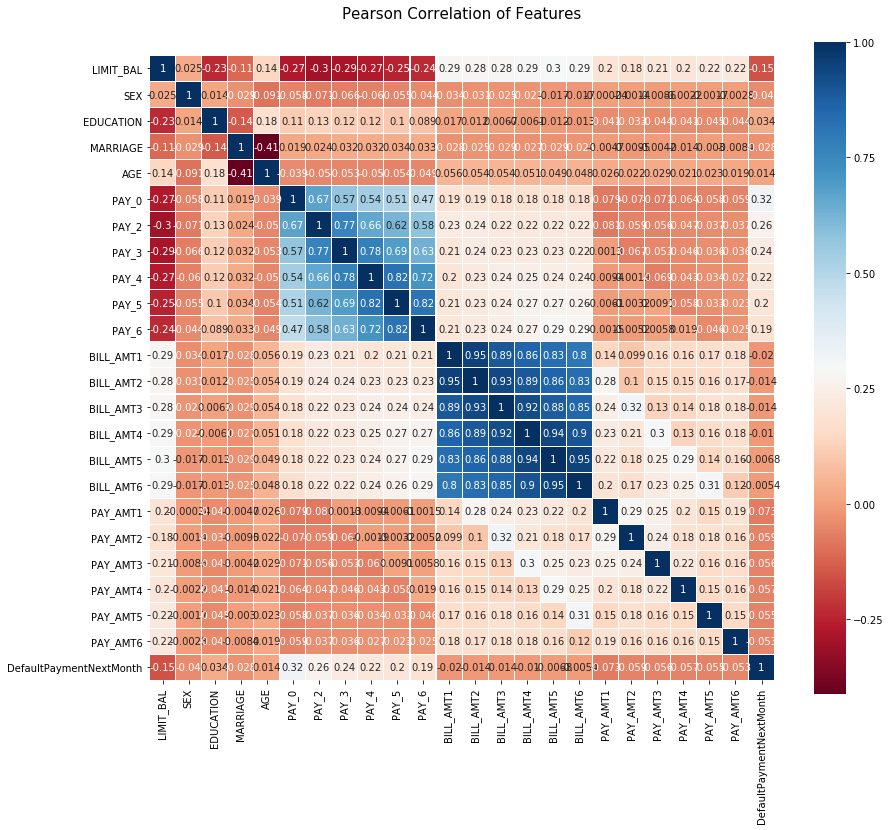

In [274]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(credit.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [275]:
credit["BillPay_Ratio1"] = (credit['BILL_AMT1'] - credit['PAY_AMT1'])/credit['LIMIT_BAL']
credit["BillPay_Ratio2"] = (credit['BILL_AMT2'] - credit['PAY_AMT2'])/credit['LIMIT_BAL']
credit["BillPay_Ratio3"] = (credit['BILL_AMT3'] - credit['PAY_AMT3'])/credit['LIMIT_BAL']
credit["BillPay_Ratio4"] = (credit['BILL_AMT4'] - credit['PAY_AMT4'])/credit['LIMIT_BAL']
credit["BillPay_Ratio5"] = (credit['BILL_AMT5'] - credit['PAY_AMT5'])/credit['LIMIT_BAL']
credit["BillPay_Ratio6"] = (credit['BILL_AMT6'] - credit['PAY_AMT6'])/credit['LIMIT_BAL']

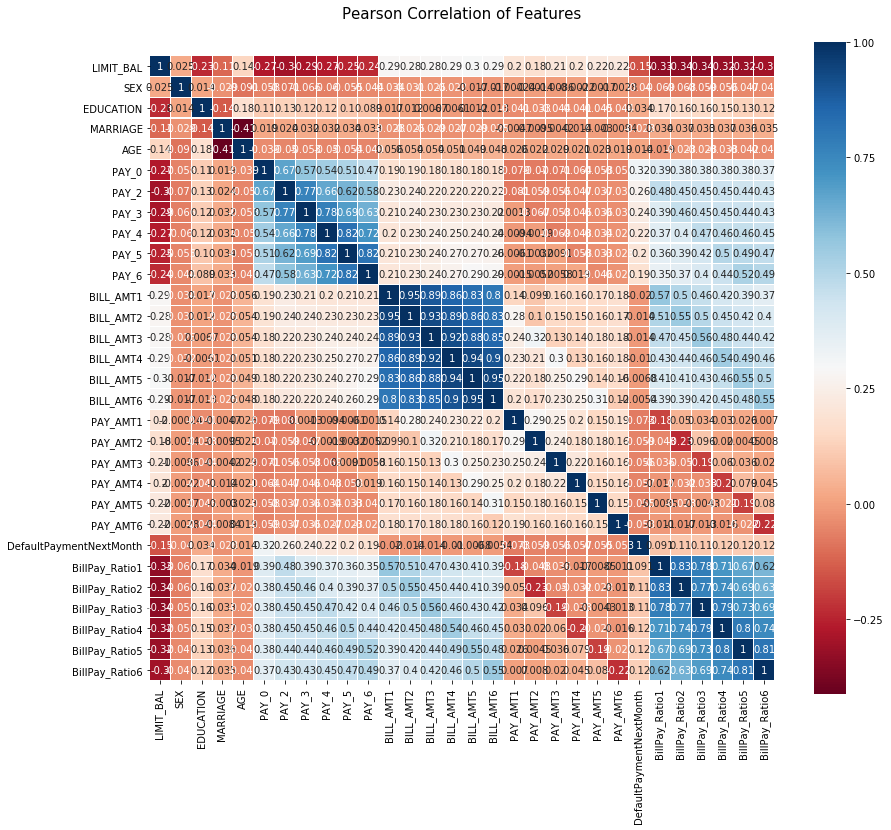

In [276]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(credit.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [277]:
credit = credit.drop(columns=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])

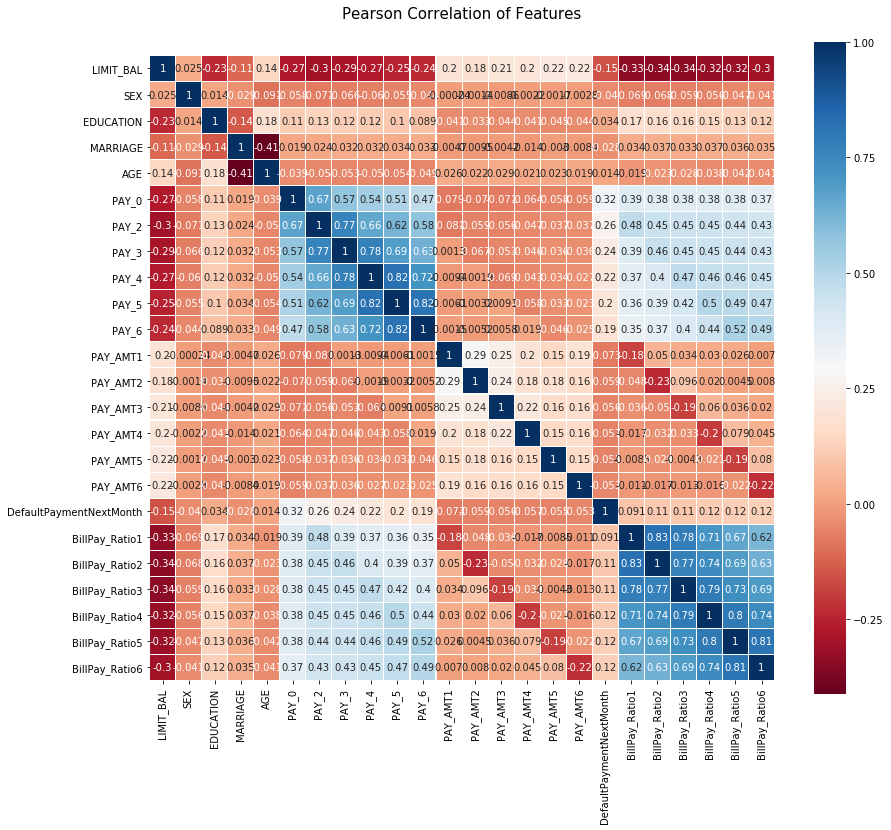

In [278]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(credit.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Check Covariance

In [147]:
#Check covariance with Pay Columns
rel = credit.iloc[:,[17, 0,5, 6,7, 8, 9, 10]]
rel.cov()

,DefaultPaymentNextMonth,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
DefaultPaymentNextMonth,0.172276,-8.267552e+03,0.151499,0.130960,0.116867,0.105115,0.096020,0.089194
LIMIT_BAL,-8267.551759,1.683446e+10,-39545.930009,-46037.648360,-44432.253315,-40571.811859,-36670.562325,-35093.083441
PAY_0,0.151499,-3.954593e+04,1.262930,0.904330,0.772384,0.707972,0.648743,0.613292
PAY_2,0.130960,-4.603765e+04,0.904330,1.433254,1.098371,0.926680,0.844886,0.792320
PAY_3,0.116867,-4.443225e+04,0.772384,1.098371,1.432492,1.087761,0.931455,0.870815
PAY_4,0.105115,-4.057181e+04,0.707972,0.926680,1.087761,1.366885,1.086161,0.963263
PAY_5,0.096020,-3.667056e+04,0.648743,0.844886,0.931455,1.086161,1.284114,1.064545
PAY_6,0.089194,-3.509308e+04,0.613292,0.792320,0.870815,0.963263,1.064545,1.322472


In [148]:
#Check covariance with Pay Amt Columns
rel = credit.iloc[:,[17, 0,11,12,13, 14, 15, 16]]
rel.cov()

,DefaultPaymentNextMonth,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
DefaultPaymentNextMonth,0.172276,-8.267552e+03,-5.013746e+02,-5.602107e+02,-4.110763e+02,-3.695159e+02,-3.495625e+02,-3.924264e+02
LIMIT_BAL,-8267.551759,1.683446e+10,4.195711e+08,5.333504e+08,4.801180e+08,4.131202e+08,4.305657e+08,5.065153e+08
PAY_AMT1,-501.374552,4.195711e+08,2.743423e+08,1.089849e+08,7.354626e+07,5.178189e+07,3.756893e+07,5.469033e+07
PAY_AMT2,-560.210740,5.333504e+08,1.089849e+08,5.308817e+08,9.929841e+07,6.501168e+07,6.368414e+07,6.456816e+07
PAY_AMT3,-411.076284,4.801180e+08,7.354626e+07,9.929841e+07,3.100051e+08,5.966970e+07,4.282921e+07,5.093879e+07
PAY_AMT4,-369.515887,4.131202e+08,5.178189e+07,6.501168e+07,5.966970e+07,2.454286e+08,3.634098e+07,4.395747e+07
PAY_AMT5,-349.562530,4.305657e+08,3.756893e+07,6.368414e+07,4.282921e+07,3.634098e+07,2.334266e+08,4.207110e+07
PAY_AMT6,-392.426415,5.065153e+08,5.469033e+07,6.456816e+07,5.093879e+07,4.395747e+07,4.207110e+07,3.160383e+08


Convert Data Types

In [149]:
#for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
#            'DefaultPaymentNextMonth']:
#   credit[col] = credit[col].astype('object')

In [279]:
for col in ['BillPay_Ratio1', 'BillPay_Ratio2', 'BillPay_Ratio3', 'BillPay_Ratio4',
        'BillPay_Ratio5', 'BillPay_Ratio6']:
   credit[col] = credit[col].astype('int64')

What Data Types Are the Features?

In [282]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
            'DefaultPaymentNextMonth']:
   credit[col] = credit[col].astype('category')

credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                  30000 non-null int64
SEX                        30000 non-null category
EDUCATION                  30000 non-null category
MARRIAGE                   30000 non-null category
AGE                        30000 non-null int64
PAY_0                      30000 non-null category
PAY_2                      30000 non-null category
PAY_3                      30000 non-null category
PAY_4                      30000 non-null category
PAY_5                      30000 non-null category
PAY_6                      30000 non-null category
PAY_AMT1                   30000 non-null int64
PAY_AMT2                   30000 non-null int64
PAY_AMT3                   30000 non-null int64
PAY_AMT4                   30000 non-null int64
PAY_AMT5                   30000 non-null int64
PAY_AMT6                   30000 non-null int64
DefaultPaymentNextMonth    30000 non-null catego

# Split Credit Data

In [284]:
# Split our data columns into features and target tables
X = credit.drop(columns=['DefaultPaymentNextMonth'])
y = credit[['DefaultPaymentNextMonth']].astype('float')

In [285]:
print(X.shape)

(30000, 23)


In [286]:
# Then split the rows into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1984)

print("Training Rows: {} \nTest Rows: {}".format(len(X_train), len(X_test)))

Training Rows: 21000 
Test Rows: 9000


# Principal Components Analysis

In [158]:
# Standardizing the features
x_train_stnd = StandardScaler().fit_transform(X_train)
x_test_stnd = StandardScaler().fit_transform(X_test)

In [159]:
#Perform PCA
pca = PCA(4)  
X_trainpca = pca.fit_transform(x_train_stnd)  
X_testpca = pca.transform(x_test_stnd)  

In [160]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.20583485 0.10483979 0.09398944 0.06576848]


# One-Hot Encode

In [232]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                  30000 non-null int64
SEX                        30000 non-null int64
EDUCATION                  30000 non-null int64
MARRIAGE                   30000 non-null int64
AGE                        30000 non-null int64
PAY_0                      30000 non-null int64
PAY_2                      30000 non-null int64
PAY_3                      30000 non-null int64
PAY_4                      30000 non-null int64
PAY_5                      30000 non-null int64
PAY_6                      30000 non-null int64
PAY_AMT1                   30000 non-null int64
PAY_AMT2                   30000 non-null int64
PAY_AMT3                   30000 non-null int64
PAY_AMT4                   30000 non-null int64
PAY_AMT5                   30000 non-null int64
PAY_AMT6                   30000 non-null int64
DefaultPaymentNextMonth    30000 non-null int64
BillPay_Ratio1             

In [235]:
# One-hot encode any categorical variables
def one_hot_mixed_df(credit):
    data_cat = credit.select_dtypes(include='object')
    data_num = credit.select_dtypes(exclude='category')
    ## One-hot transform the objects
    data_cat_dummies = pd.get_dummies(data_cat,drop_first=True)
    ## Join dummies with numerics
    data_onehot = pd.concat([data_cat_dummies, data_num], axis=1, sort=False)
    return(data_onehot)

# Apply transformations
X_onehot = one_hot_mixed_df(X)

## Verify results
print('Total Columns: {}'.format(X.shape[1]))
print('Total Columns post-Dummy: {}'.format(X_onehot.shape[1]))

Total Columns: 23
Total Columns post-Dummy: 87


In [247]:
#X_onehot.info()

In [238]:
y_onehot = y
# Then split the rows into train and test
X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(X_onehot, y_onehot,
                                                                                test_size=0.3, random_state=1984)

In [239]:
# Check the first 5 rows of the data frame
X_onehot.head()

,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BillPay_Ratio1,BillPay_Ratio2,BillPay_Ratio3,BillPay_Ratio4,BillPay_Ratio5,BillPay_Ratio6
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,1,0,0,0,...,1000,1000,0,2000,0,0,0,0,0,0
2,1,1,0,0,1,0,0,1,0,0,...,1000,1000,1000,5000,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,1200,1100,1069,1000,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,10000,9000,689,679,0,0,0,0,0,0


In [183]:
#X_onehot.info()

In [287]:
# list of different classifiers we are going to test
clfs = {
'LogisticRegression' : LogisticRegression(),
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier()
}

# Predictive Modeling Using Credit Data

In [288]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Kappa', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train,y_train.values.ravel())
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test
                                                                , y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Kappa': metrics.cohen_kappa_score(y_test, y_pred),        
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Kappa,Accuracy
0,LogisticRegression,0.721154,0.038304,0.072745,0.051939,0.787556
1,GaussianNB,0.241441,0.893258,0.380135,0.057199,0.366222
2,RandomForest,0.619461,0.328396,0.429239,0.327924,0.810000
3,DecisionTreeClassifier,0.375409,0.410112,0.391994,0.213277,0.723222
4,SVM,0.586207,0.017365,0.033730,0.021481,0.783556
5,KNeighborsClassifier,0.372718,0.177222,0.240222,0.116313,0.756111
6,GradientBoosting,0.687500,0.376404,0.486469,0.393032,0.827111


# Predictive Modeling Using Credit PCA Data

In [259]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Kappa','Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_trainpca,y_train.values.ravel())
    y_pred = clf.predict(X_testpca)
    y_score = clf.score(X_testpca,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test
                                                                , y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Kappa': metrics.cohen_kappa_score(y_test, y_pred), 
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Kappa,Accuracy
0,LogisticRegression,0.674699,0.143003,0.235988,0.173063,0.798556
1,GaussianNB,0.573892,0.237998,0.336462,0.239456,0.795778
2,RandomForest,0.541628,0.295710,0.382557,0.270454,0.792333
3,DecisionTreeClassifier,0.368941,0.400409,0.384031,0.203708,0.720556
4,SVM,0.631010,0.268131,0.376344,0.283357,0.806667
5,KNeighborsClassifier,0.530278,0.330950,0.407547,0.288599,0.790667
6,GradientBoosting,0.621475,0.292646,0.397917,0.300476,0.807333


# Predictive Modeling Using Credit One-Hot Encoding Data

In [240]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train_onehot,y_train.values.ravel())
    y_pred = clf.predict(X_test_onehot)
    y_score = clf.score(X_test_onehot,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test
                                                                , y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

C:\Users\brisa.ponce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\brisa.ponce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LogisticRegression,0.000000,0.000000,0.000000,0.782444
1,GaussianNB,0.241866,0.892237,0.380569,0.368111
2,RandomForest,0.615313,0.336568,0.435127,0.809889
3,DecisionTreeClassifier,0.386007,0.414198,0.399606,0.729222
4,SVM,0.605263,0.023493,0.045231,0.784222
5,KNeighborsClassifier,0.373391,0.177732,0.240830,0.756222
6,GradientBoosting,0.688142,0.376404,0.486629,0.827222


# Model Tuning (Credit Data)

Gradient Boosting Model Performed the Best Using Credit Data

## Gradient Boosting Model - Baseline

Accuracy of the Baseline GBM on test set: 0.827
             precision    recall  f1-score   support

        0.0       0.85      0.95      0.90      7042
        1.0       0.69      0.38      0.49      1958

avg / total       0.81      0.83      0.81      9000



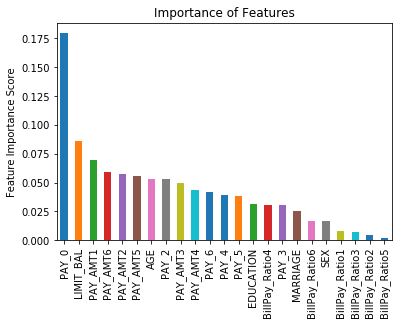

In [216]:
baseline = GradientBoostingClassifier()

baseline.fit(X_train,y_train.values.ravel())
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the Baseline GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

In [264]:
#Function to optimize model using gridsearch 
def gridsearch(model, params,X_train, X_test, y_train, y_test, kfold):
    gs = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    gs.fit(X_train, y_train)
    print ('Best params: ', gs.best_params_)
    print ('Best AUC on Train set: ', gs.best_score_)
    print ('Best AUC on Test set: ', gs.score(x_test, y_test))

# Function to generate confusion matrix
def confmat(pred, y_test):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    conf = pd.DataFrame(conmat, index=['Defaulter', 'Not Defaulter'],
                             columns=['Predicted Defaulter', 'Predicted Not Defaulter'])
    print (conf)

# Function to plot roc curve
def roc(prob, y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.figure(figsize=[7,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive rate', fontsize=15)
    plt.ylabel('True Positive rate', fontsize=15)
    plt.title('ROC curve for Credit Default', fontsize=16)
    plt.legend(loc='Lower Right')
    plt.show()
    
def model(md, X_train, y_train,X_test, y_test):
    md.fit(X_train, y_train)
    pred = md.predict(X_test)
    prob = md.predict_proba(X_test)[:,1]
    print (' ') 
    print ('Accuracy on Train set: ', md.score(X_train, y_train))
    print ('Accuracy on Test set: ', md.score(X_test, y_test))
    print (' ')
    print(classification_report(y_test, pred))
    print (' ')
    print ('Confusion Matrix')
    confmat(pred, y_test)
    roc(prob, y_test)
    return md

 
Accuracy on Train set:  0.855
Accuracy on Test set:  0.8248888888888889
 
             precision    recall  f1-score   support

        0.0       0.84      0.95      0.89      7042
        1.0       0.68      0.37      0.48      1958

avg / total       0.81      0.82      0.80      9000

 
Confusion Matrix
               Predicted Defaulter  Predicted Not Defaulter
Defaulter                      716                     1242
Not Defaulter                  334                     6708


C:\Users\brisa.ponce\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "Lower Right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


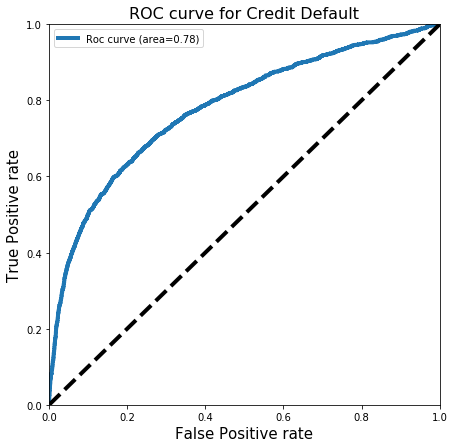

In [265]:
# feature selection with the best model from grid search
gb = GradientBoostingClassifier(learning_rate= 0.02, max_depth= 7,n_estimators=300, max_features = 0.9,
                                min_samples_leaf = 5)
model_gb = model(gb, X_train, y_train.values.ravel(),X_test, y_test)

Accuracy of Model1 GBM on test set: 0.824
             precision    recall  f1-score   support

        0.0       0.84      0.95      0.89      7042
        1.0       0.68      0.36      0.47      1958

avg / total       0.81      0.82      0.80      9000



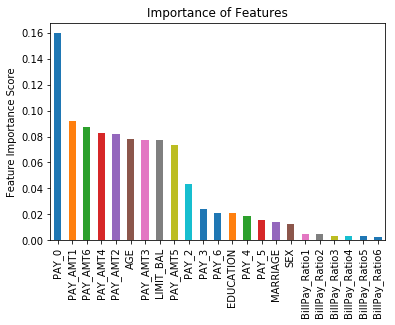

In [296]:
FinalModel = GradientBoostingClassifier(learning_rate= 0.02, max_depth= 7,n_estimators=300, max_features = 0.9,
                                min_samples_leaf = 5)
FinalModel.fit(X_train,y_train.values.ravel())
predictors=list(X_train)
feat_imp = pd.Series(FinalModel.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of Model1 GBM on test set: {:.3f}'.format(FinalModel.score(X_test, y_test)))
pred=FinalModel.predict(X_test)
print(classification_report(y_test, pred))

## Gradient Boosting Model - Model1 (tuning max depth)

In [213]:
#TUNING MAX DEPTH
p_test1 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500,
                                                            min_samples_split=2, min_samples_leaf=1, 
                                                            subsample=1,max_features='sqrt', random_state=10), 
param_grid = p_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train.values.ravel())
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

C:\Users\brisa.ponce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.81691, std: 0.00370, params: {'max_depth': 2},
  mean: 0.81771, std: 0.00264, params: {'max_depth': 3},
  mean: 0.81786, std: 0.00317, params: {'max_depth': 4},
  mean: 0.81833, std: 0.00299, params: {'max_depth': 5},
  mean: 0.81676, std: 0.00265, params: {'max_depth': 6},
  mean: 0.81610, std: 0.00337, params: {'max_depth': 7}],
 {'max_depth': 5},
 0.8183334611273153)

Accuracy of Model1 GBM on test set: 0.827
             precision    recall  f1-score   support

        0.0       0.85      0.95      0.90      7042
        1.0       0.69      0.37      0.48      1958

avg / total       0.81      0.83      0.81      9000



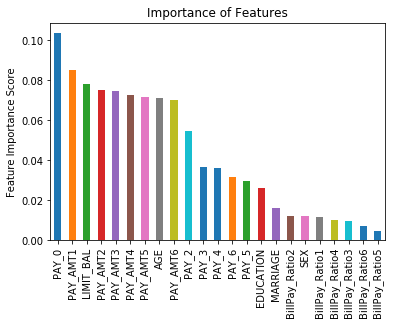

In [219]:
model1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500, max_depth=5, min_samples_split=2, 
                                    min_samples_leaf=1, subsample=1, max_features='sqrt', random_state=10)
model1.fit(X_train,y_train.values.ravel())
predictors=list(X_train)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of Model1 GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

## Gradient Boosting Model - Model2 (tuning max features)

In [222]:
#TUNING MAX FEATURES
p_test2 = {'max_features':[4,5,6,7,8,9,10]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,
                                                            n_estimators=1500,max_depth=4, 
                                                            min_samples_split=40, min_samples_leaf=7, 
                                                            subsample=1, random_state=10), 
param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train.values.ravel())
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

C:\Users\brisa.ponce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.81829, std: 0.00284, params: {'max_features': 4},
  mean: 0.81810, std: 0.00256, params: {'max_features': 5},
  mean: 0.81843, std: 0.00263, params: {'max_features': 6},
  mean: 0.81852, std: 0.00228, params: {'max_features': 7},
  mean: 0.81900, std: 0.00275, params: {'max_features': 8},
  mean: 0.81886, std: 0.00250, params: {'max_features': 9},
  mean: 0.81919, std: 0.00254, params: {'max_features': 10}],
 {'max_features': 10},
 0.8191906380493558)

Accuracy of Model2 GBM on test set: 0.825
             precision    recall  f1-score   support

        0.0       0.84      0.95      0.89      7042
        1.0       0.68      0.37      0.48      1958

avg / total       0.81      0.82      0.80      9000



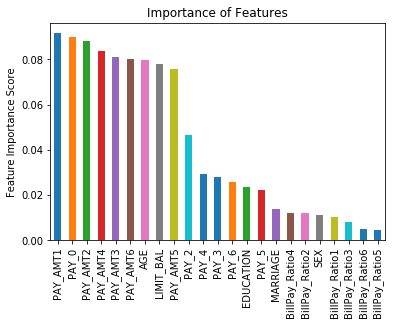

In [223]:
model2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500, max_depth=5, min_samples_split=2, 
                                    min_samples_leaf=1, subsample=1, max_features=10, random_state=10)
model2.fit(X_train,y_train.values.ravel())
predictors=list(X_train)
feat_imp = pd.Series(model2.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of Model2 GBM on test set: {:.3f}'.format(model2.score(X_test, y_test)))
pred=model2.predict(X_test)
print(classification_report(y_test, pred))

# Comparison of ROC AUC

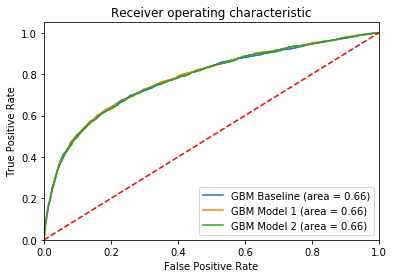

In [224]:
#calculate values for ROC AUC plot
#baseline model
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(X_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#model 2 
model2_roc_auc = roc_auc_score(y_test, model2.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, model2.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Model 2 (area = %0.2f)' % model2_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

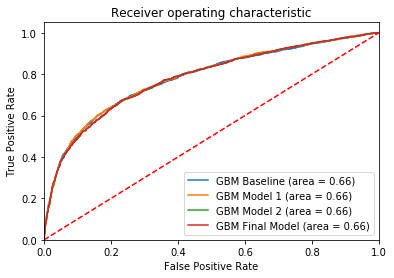

In [297]:
#calculate values for ROC AUC plot
#baseline model
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(X_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#model 2 
model2_roc_auc = roc_auc_score(y_test, model2.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, model2.predict_proba(X_test)[:,1])
#Final Model
finalmodel_roc_auc = roc_auc_score(y_test, FinalModel.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, FinalModel.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Model 2 (area = %0.2f)' % model2_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % finalmodel_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Accuracy of the Baseline with one-hot encoding GBM on test set: 0.827
             precision    recall  f1-score   support

        0.0       0.85      0.95      0.90      7042
        1.0       0.69      0.38      0.49      1958

avg / total       0.81      0.83      0.81      9000



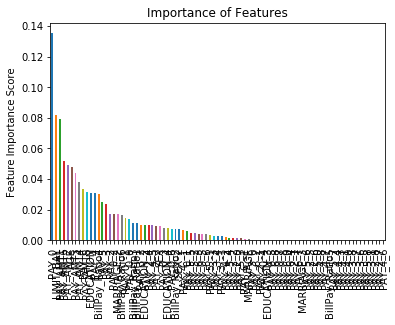

In [243]:
# testing one-hot
baseline_oh = GradientBoostingClassifier()

baseline_oh.fit(X_train_onehot, y_train.values.ravel())
predictors=list(X_train_onehot)
feat_imp = pd.Series(baseline_oh.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the Baseline with one-hot encoding GBM on test set: {:.3f}'.format(baseline_oh.score(X_test_onehot,
                                                                                                            y_test)))
pred=baseline_oh.predict(X_test_onehot)
print(classification_report(y_test, pred))